# EDA and Generation for Subset-192

In [1]:
import missingno as msno
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
from datetime import datetime

In [2]:
def visualize_missingno(
    df: pd.DataFrame, matrix: bool = True, heatmap: bool = True, bar: bool = True
):
    if matrix:
        msno.matrix(df)
        plt.show()

    if heatmap:
        msno.heatmap(df, labels=False)
        plt.show()

    if bar:
        msno.bar(df)
        plt.show()

In [3]:
gdf = gpd.read_file("../datasets/metr-imc/subsets/metr-imc-192/selected_road_192.shp")
gdf

,index,sensor_id,geometry
0,71,1650026001,POINT (126.7067 37.39807)
1,73,1650042800,POINT (126.73509 37.42093)
2,127,1650074500,POINT (126.71392 37.40455)
3,129,1650232500,POINT (126.73677 37.40341)
4,131,1650388801,POINT (126.69317 37.40302)
...,...,...,...
556,16293,1650037302,POINT (126.72667 37.41513)
557,16301,1650002302,POINT (126.71535 37.39645)
558,16311,1650231700,POINT (126.73463 37.40239)
559,16319,1640011900,POINT (126.67742 37.40453)


In [4]:
from metr.dataset.metr_imc.converter.metr_imc import MetrImcTrafficData

traffic_data = MetrImcTrafficData(file_path="../datasets/metr-imc/metr-imc.h5")
traffic_data.raw

,1680254606,1650051800,1670030907,1610002406,1650374201,1650038700,1690052500,1650054600,1640002100,1660001406,...,1680093100,1610104400,1650230200,1630168900,1640247500,1610120700,1610028300,1650352801,1630026000,1660003900
2023-01-01 00:00:00,0.0,NaN,NaN,NaN,NaN,NaN,12.0,NaN,9.0,NaN,...,91.0,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,409.0
2023-01-01 01:00:00,0.0,NaN,NaN,NaN,NaN,NaN,12.0,NaN,25.0,NaN,...,97.0,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,370.0
2023-01-01 02:00:00,0.0,NaN,NaN,NaN,NaN,NaN,12.0,NaN,0.0,NaN,...,54.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,236.0
2023-01-01 03:00:00,0.0,NaN,NaN,NaN,NaN,NaN,12.0,NaN,0.0,NaN,...,38.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,219.0
2023-01-01 04:00:00,0.0,NaN,NaN,NaN,NaN,NaN,12.0,NaN,0.0,NaN,...,31.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-06 19:00:00,NaN,149.0,315.0,0.0,6.0,15.0,19.0,99.0,166.0,219.0,...,452.0,NaN,0.0,NaN,NaN,NaN,0.0,129.0,789.0,1182.0
2023-12-06 20:00:00,NaN,99.0,266.0,0.0,0.0,3.0,16.0,50.0,122.0,172.0,...,358.0,NaN,0.0,NaN,NaN,NaN,0.0,86.0,636.0,994.0
2023-12-06 21:00:00,NaN,89.0,230.0,0.0,0.0,0.0,12.0,15.0,125.0,195.0,...,326.0,NaN,0.0,NaN,NaN,NaN,0.0,37.0,517.0,818.0
2023-12-06 22:00:00,NaN,46.0,135.0,0.0,0.0,0.0,10.0,0.0,68.0,148.0,...,233.0,NaN,0.0,NaN,NaN,NaN,0.0,9.0,319.0,617.0


In [5]:
road_filter: pd.Series = gdf["sensor_id"]
road_filter = road_filter.astype(str).to_list()
traffic_data.select_columns(road_filter)
df = traffic_data.data
df

,1650026001,1650042800,1650074500,1650232500,1650388801,1650395901,1650381201,1640050304,1640012500,1640015100,...,1630011803,1640013902,1650352801,1650043801,1640244000,1650037302,1650002302,1650231700,1640011900,1650090702
2023-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,34.0,NaN
2023-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN
2023-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2023-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
2023-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-06 19:00:00,274.0,152.0,6.0,26.0,262.0,134.0,47.0,392.0,10.0,48.0,...,241.0,117.0,129.0,20.0,99.0,150.0,NaN,0.0,196.0,162.0
2023-12-06 20:00:00,256.0,66.0,0.0,0.0,214.0,119.0,17.0,306.0,0.0,14.0,...,148.0,37.0,86.0,25.0,62.0,166.0,NaN,0.0,138.0,133.0
2023-12-06 21:00:00,192.0,90.0,3.0,0.0,133.0,107.0,0.0,222.0,0.0,19.0,...,146.0,47.0,37.0,17.0,70.0,121.0,NaN,0.0,135.0,142.0
2023-12-06 22:00:00,125.0,32.0,0.0,0.0,69.0,61.0,0.0,125.0,0.0,9.0,...,77.0,35.0,9.0,6.0,33.0,78.0,NaN,0.0,59.0,77.0


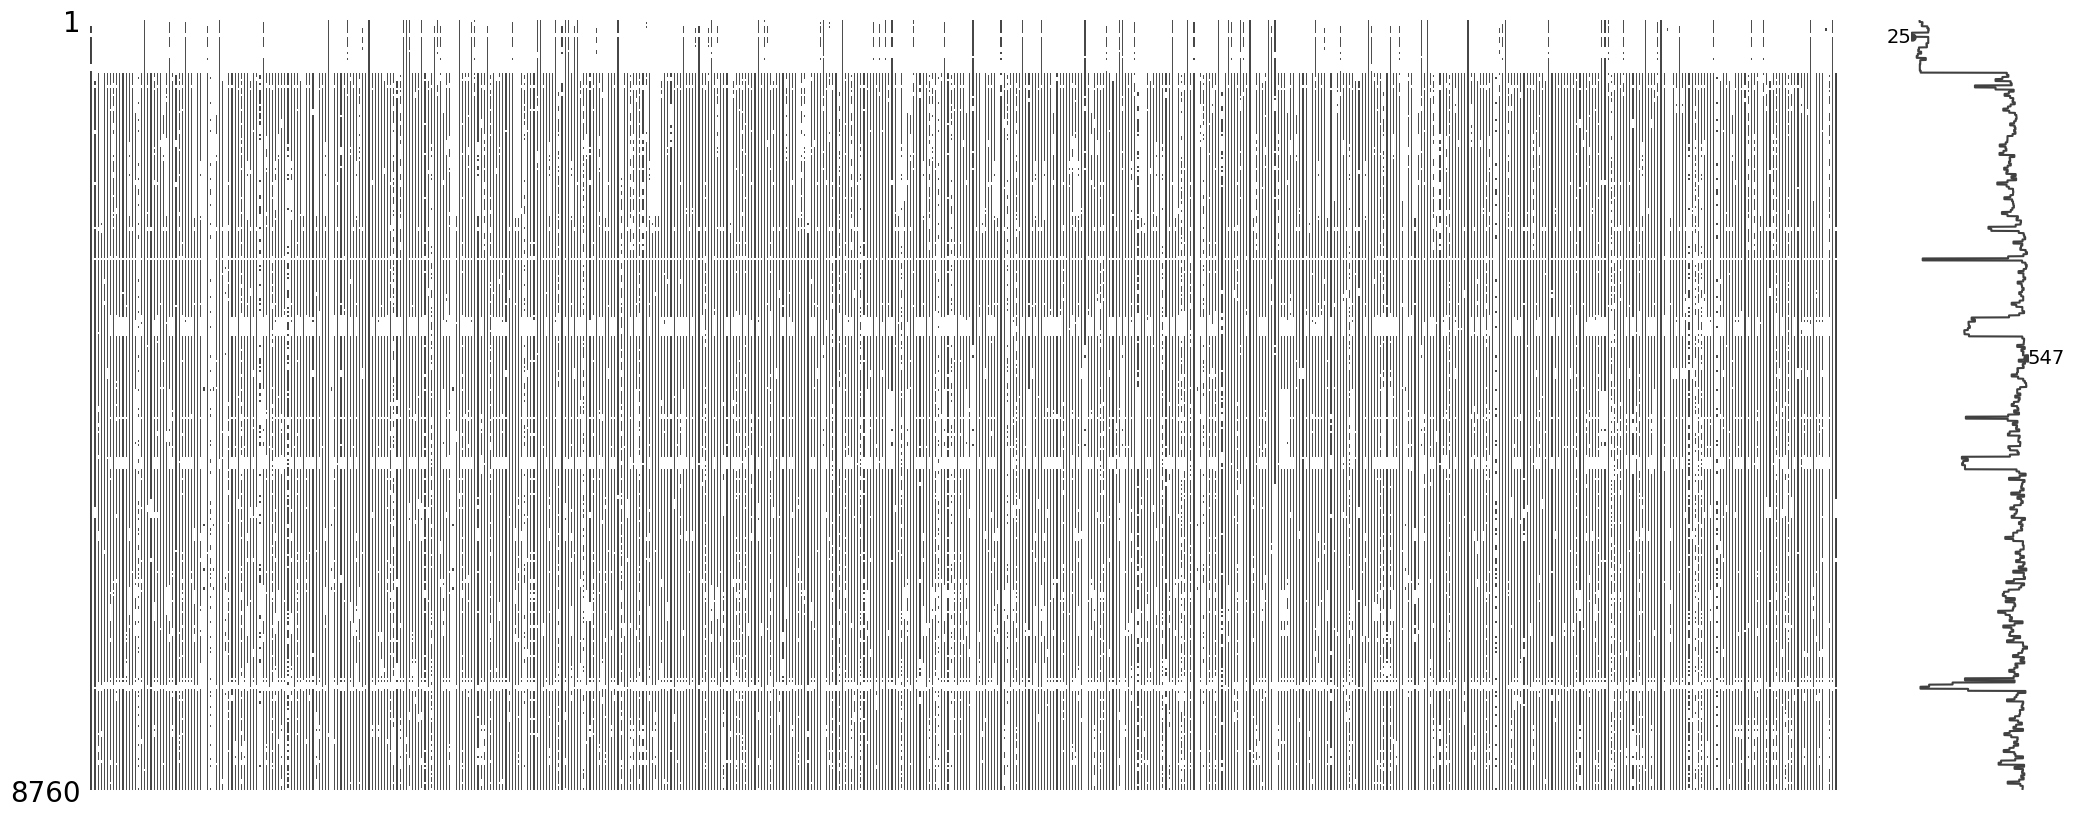

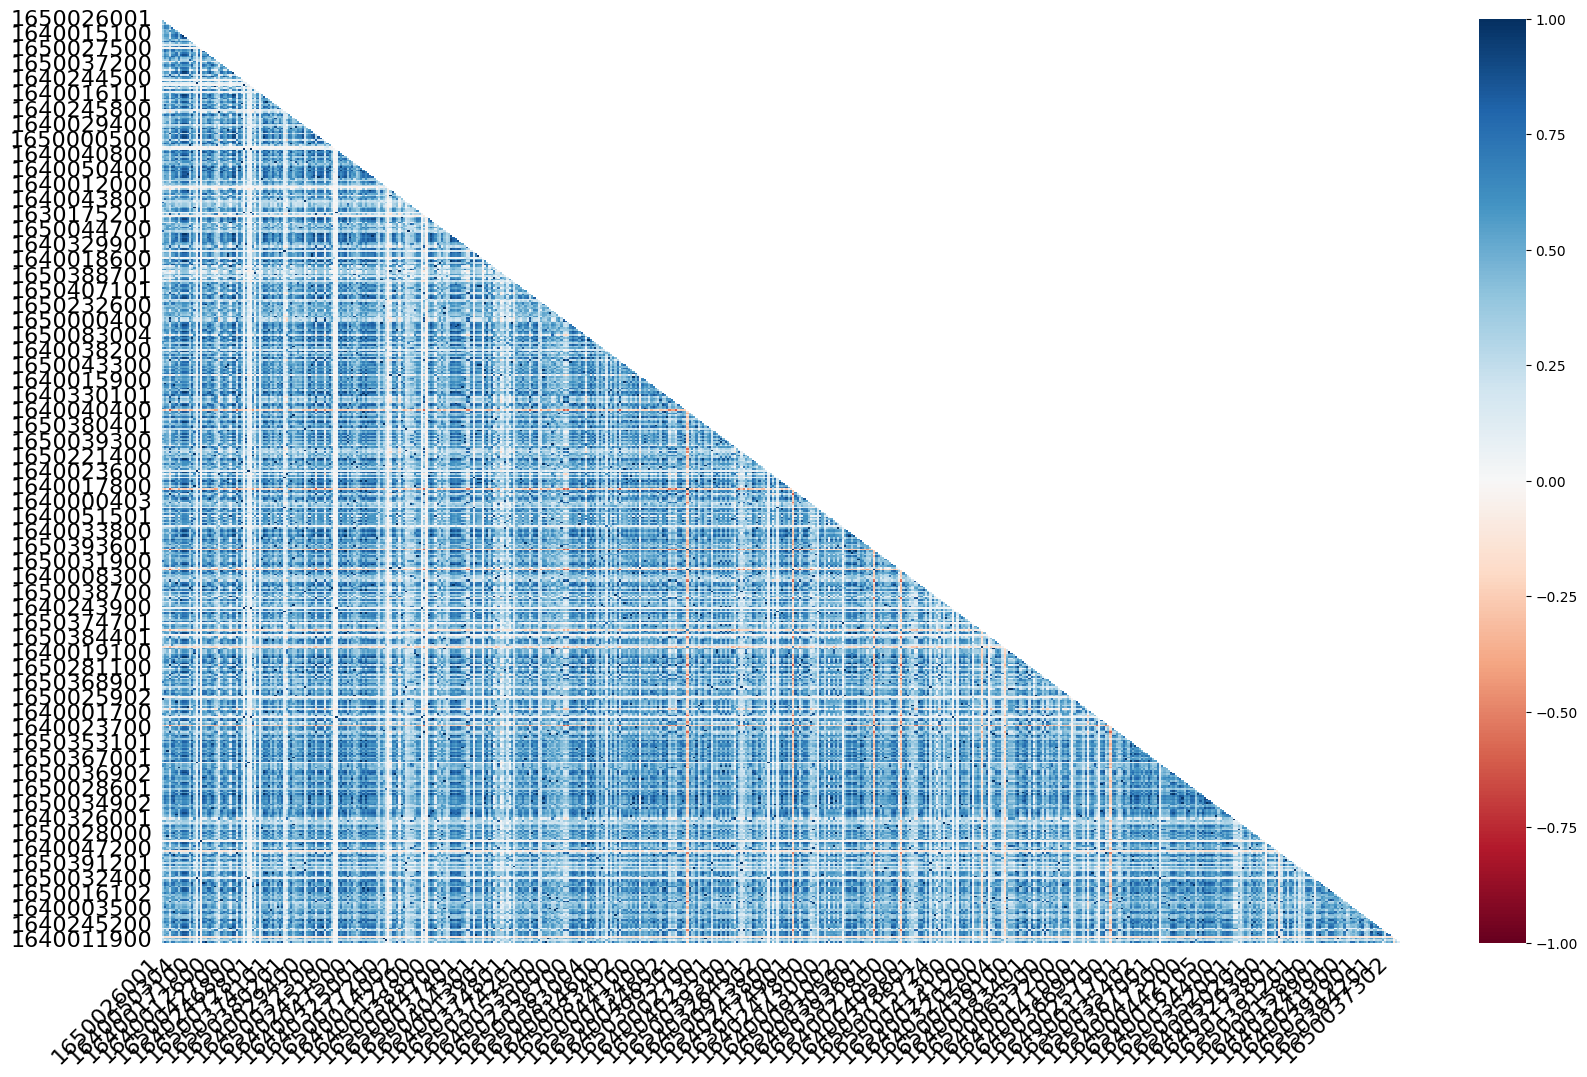

In [6]:
visualize_missingno(df, bar=False)

In [7]:
df.notna().sum().describe()

count     561.000000
mean     7032.470588
std      1484.927283
min        24.000000
25%      6792.000000
50%      7368.000000
75%      7848.000000
max      8760.000000
dtype: float64

In [8]:
over75: pd.Series = (df.notna().sum() > df.notna().sum().describe()["50%"]) 
over75_df = df[over75[over75 == True].index]

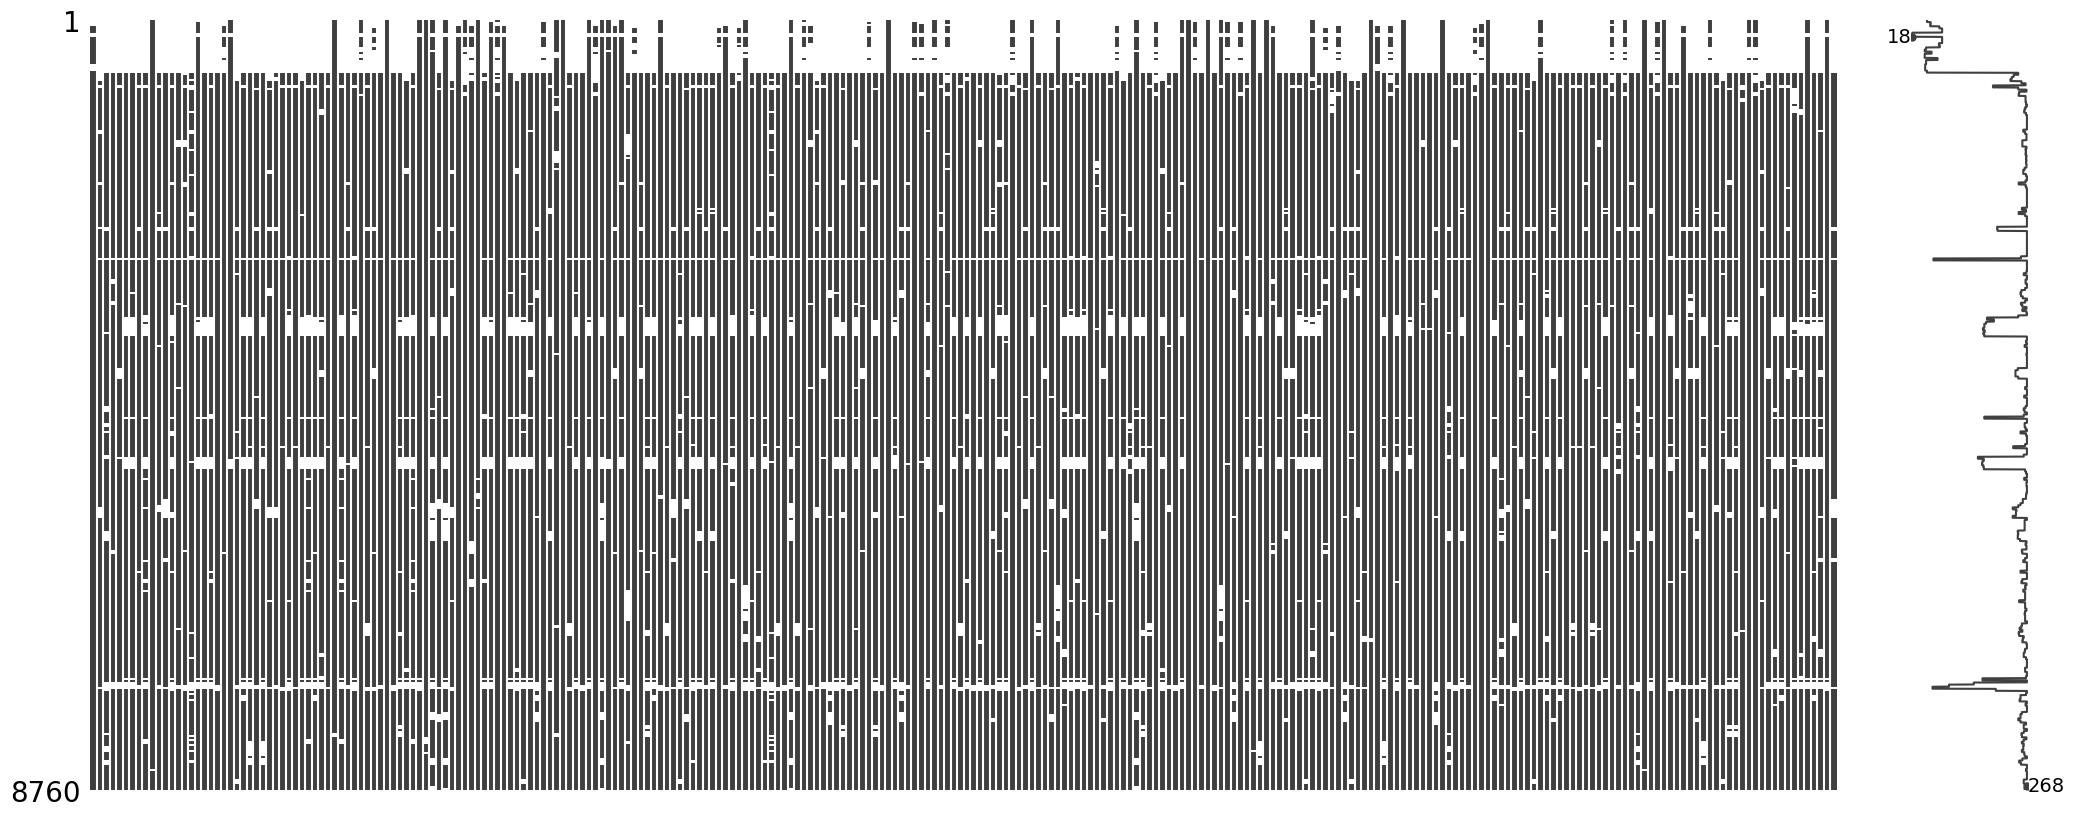

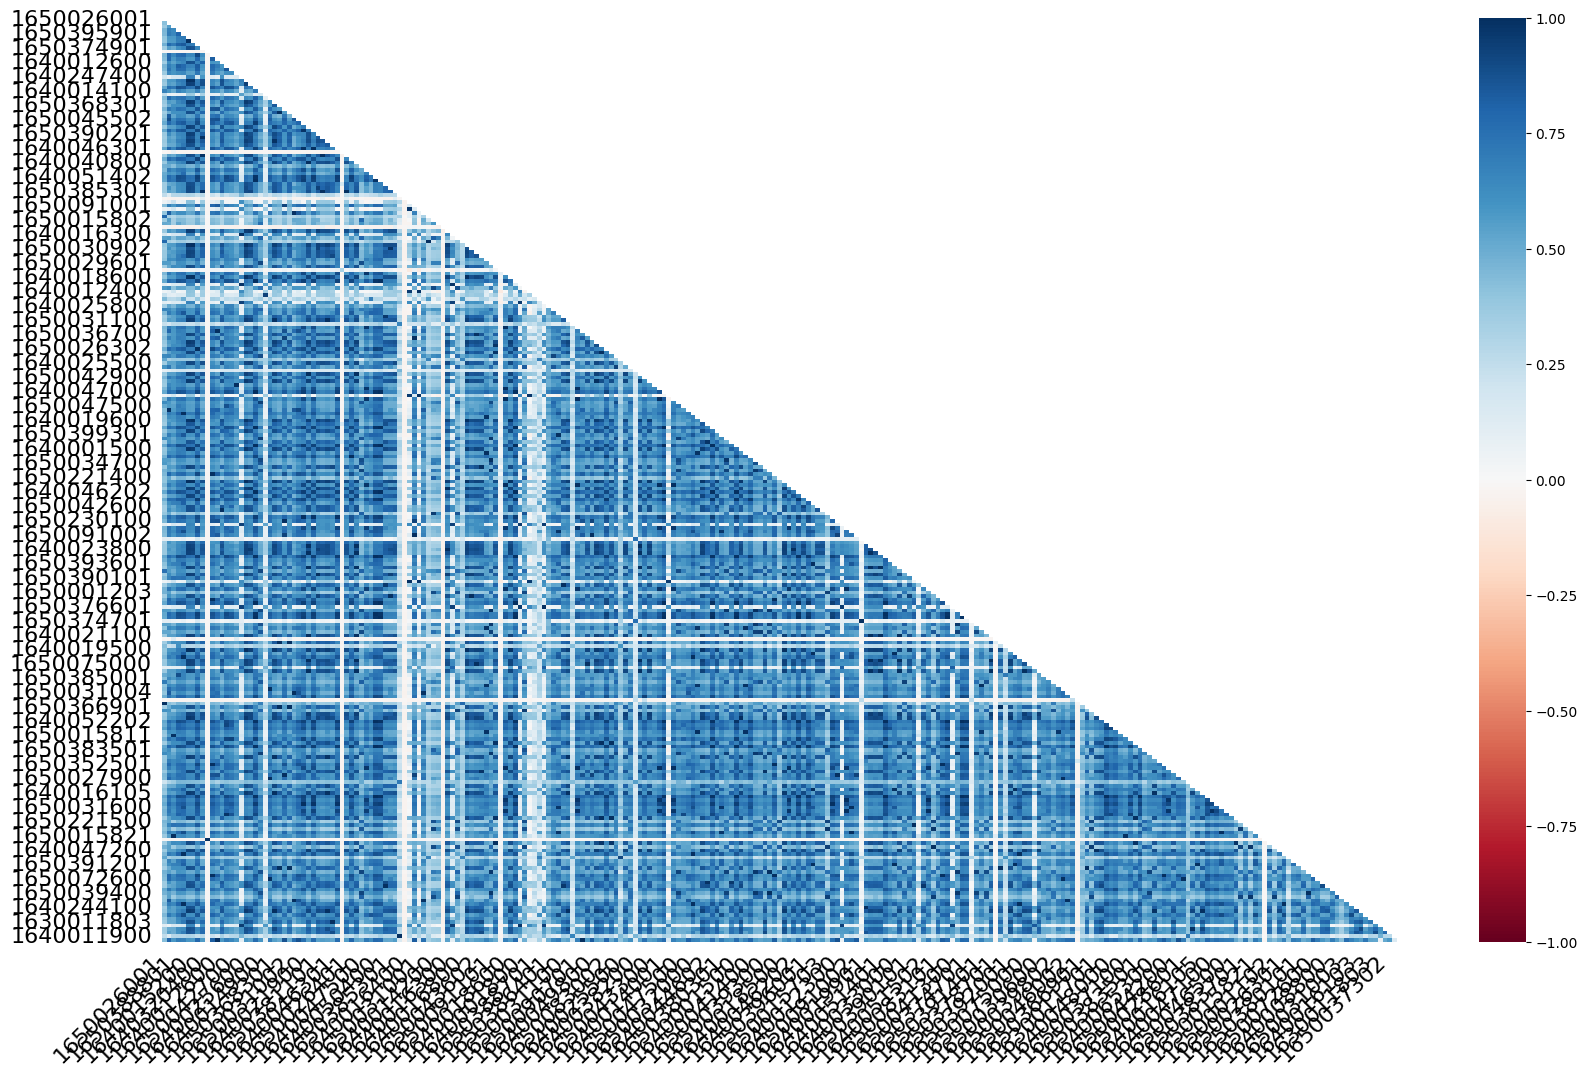

In [9]:
visualize_missingno(over75_df, bar=False)

In [19]:
# 엑셀에서 적당한 범위 찾아서 시간 기록해서 추출할 것

import metr
from metr.dataset.metr_imc.converter.metr_imc import MetrImcTrafficData

tr_dat = MetrImcTrafficData(file_path="../datasets/metr-imc/metr-imc.h5")
tr_dat.data

,1680254606,1650051800,1670030907,1610002406,1650374201,1650038700,1690052500,1650054600,1640002100,1660001406,...,1680093100,1610104400,1650230200,1630168900,1640247500,1610120700,1610028300,1650352801,1630026000,1660003900
2023-01-01 00:00:00,0.0,NaN,NaN,NaN,NaN,NaN,12.0,NaN,9.0,NaN,...,91.0,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,409.0
2023-01-01 01:00:00,0.0,NaN,NaN,NaN,NaN,NaN,12.0,NaN,25.0,NaN,...,97.0,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,370.0
2023-01-01 02:00:00,0.0,NaN,NaN,NaN,NaN,NaN,12.0,NaN,0.0,NaN,...,54.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,236.0
2023-01-01 03:00:00,0.0,NaN,NaN,NaN,NaN,NaN,12.0,NaN,0.0,NaN,...,38.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,219.0
2023-01-01 04:00:00,0.0,NaN,NaN,NaN,NaN,NaN,12.0,NaN,0.0,NaN,...,31.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-06 19:00:00,NaN,149.0,315.0,0.0,6.0,15.0,19.0,99.0,166.0,219.0,...,452.0,NaN,0.0,NaN,NaN,NaN,0.0,129.0,789.0,1182.0
2023-12-06 20:00:00,NaN,99.0,266.0,0.0,0.0,3.0,16.0,50.0,122.0,172.0,...,358.0,NaN,0.0,NaN,NaN,NaN,0.0,86.0,636.0,994.0
2023-12-06 21:00:00,NaN,89.0,230.0,0.0,0.0,0.0,12.0,15.0,125.0,195.0,...,326.0,NaN,0.0,NaN,NaN,NaN,0.0,37.0,517.0,818.0
2023-12-06 22:00:00,NaN,46.0,135.0,0.0,0.0,0.0,10.0,0.0,68.0,148.0,...,233.0,NaN,0.0,NaN,NaN,NaN,0.0,9.0,319.0,617.0


In [20]:
tr_dat.select_columns(over75_df.columns)
tr_dat

In [21]:
tr_dat.select_period(start_date=datetime(2023, 2, 4), end_date=datetime(2023, 4, 21, 23))
tr_dat.data

,1650026001,1650042800,1650074500,1650388801,1650395901,1640015100,1640015200,1650381701,1650374901,1640320400,...,1640244100,1640016103,1650389501,1650394201,1630011803,1640013902,1650043801,1650037302,1640011900,1650090702
2023-02-04 00:00:00,25.0,22.0,14.0,62.0,16.0,11.0,32.0,8.0,0.0,176.0,...,54.0,4.0,54.0,NaN,25.0,44.0,30.0,61.0,43.0,9.0
2023-02-04 01:00:00,19.0,0.0,9.0,40.0,0.0,6.0,24.0,0.0,0.0,136.0,...,24.0,0.0,36.0,NaN,3.0,23.0,17.0,39.0,21.0,6.0
2023-02-04 02:00:00,12.0,0.0,0.0,40.0,0.0,13.0,19.0,0.0,0.0,102.0,...,29.0,0.0,26.0,NaN,3.0,10.0,5.0,15.0,25.0,6.0
2023-02-04 03:00:00,9.0,0.0,0.0,26.0,0.0,3.0,9.0,0.0,0.0,89.0,...,31.0,4.0,12.0,NaN,0.0,6.0,3.0,19.0,9.0,0.0
2023-02-04 04:00:00,7.0,9.0,0.0,25.0,0.0,0.0,25.0,0.0,0.0,118.0,...,20.0,0.0,12.0,NaN,0.0,14.0,18.0,7.0,13.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-21 19:00:00,201.0,133.0,63.0,299.0,140.0,38.0,46.0,90.0,20.0,688.0,...,122.0,122.0,192.0,352.0,251.0,196.0,27.0,199.0,582.0,201.0
2023-04-21 20:00:00,211.0,74.0,47.0,254.0,147.0,43.0,25.0,78.0,0.0,781.0,...,102.0,129.0,141.0,336.0,213.0,211.0,0.0,178.0,620.0,193.0
2023-04-21 21:00:00,152.0,78.0,34.0,151.0,118.0,22.0,10.0,26.0,6.0,728.0,...,93.0,53.0,131.0,195.0,153.0,151.0,0.0,156.0,428.0,156.0
2023-04-21 22:00:00,110.0,39.0,13.0,114.0,48.0,0.0,6.0,6.0,0.0,634.0,...,43.0,56.0,54.0,107.0,138.0,73.0,0.0,79.0,241.0,101.0


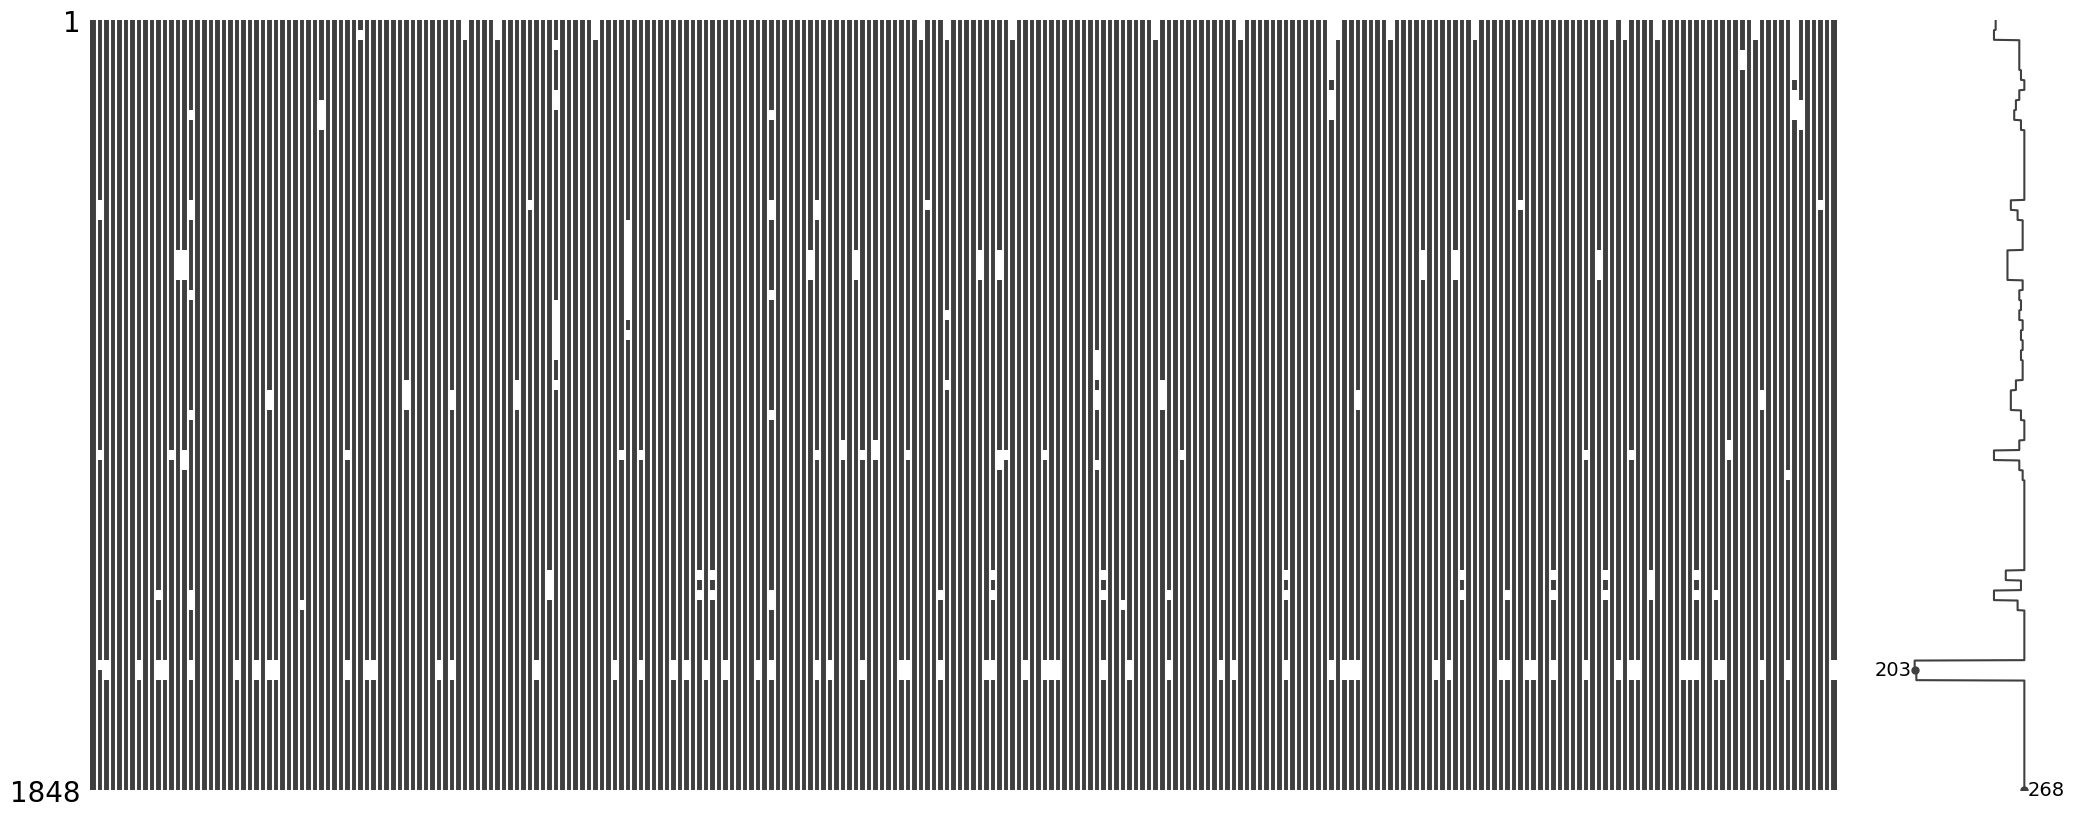

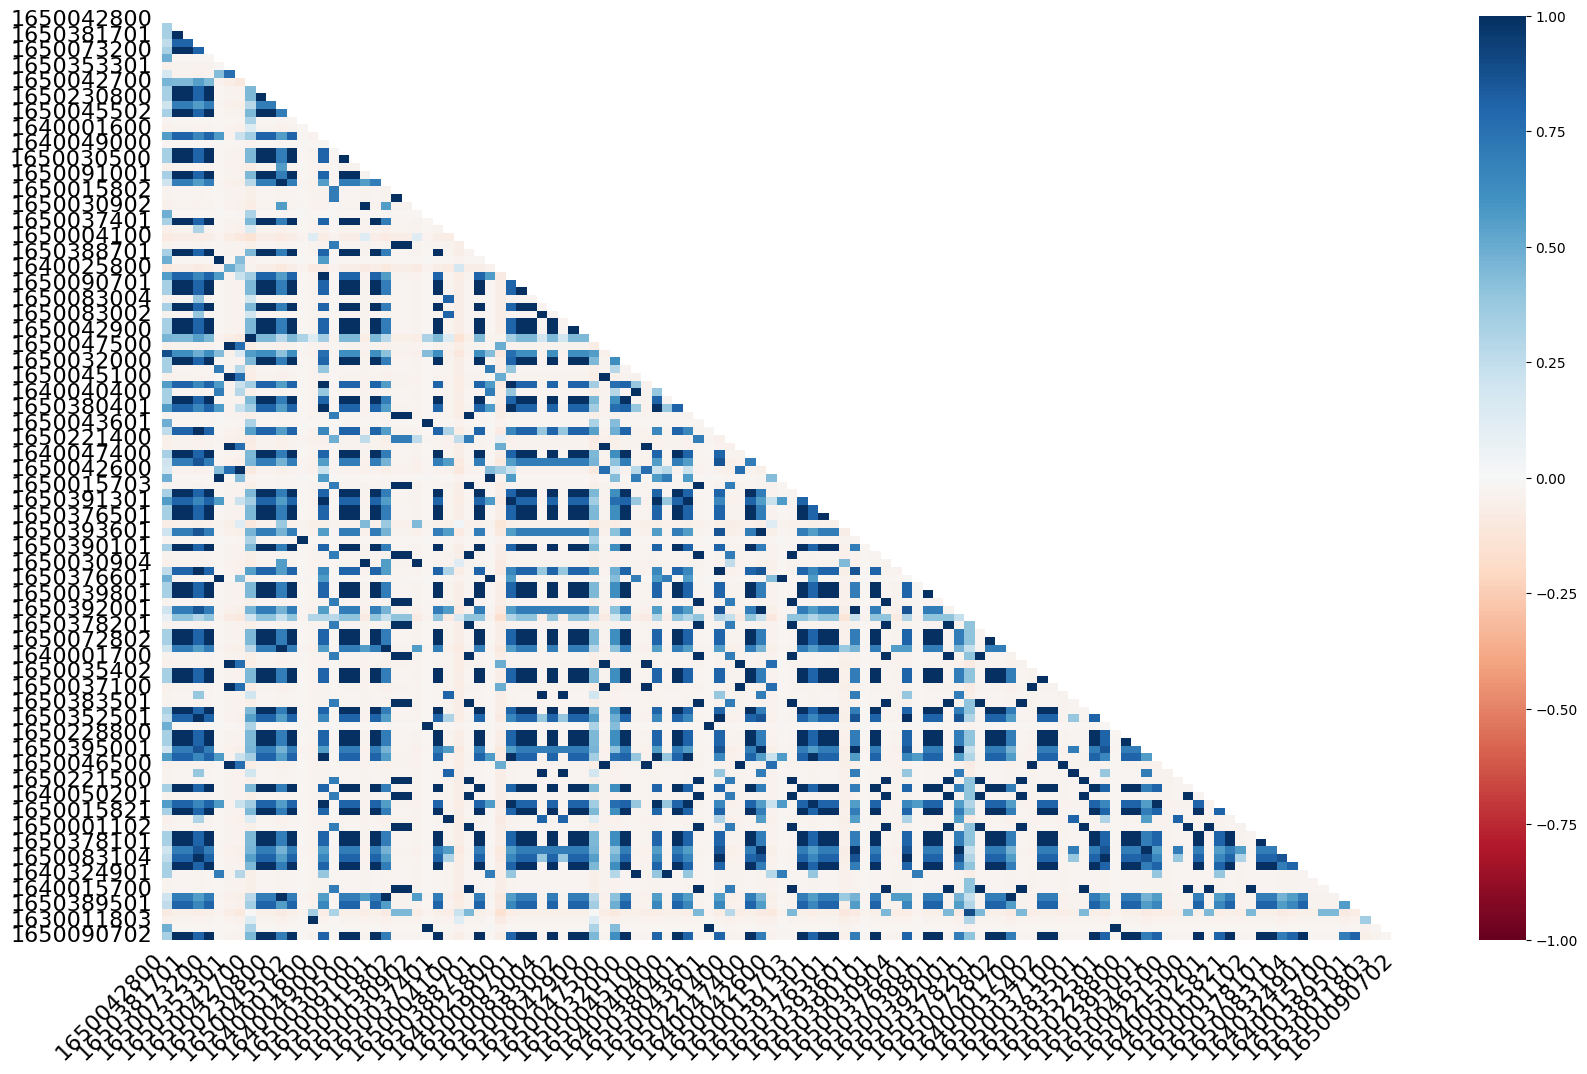

In [22]:
visualize_missingno(tr_dat.data, bar=False)

In [23]:
tr_dat.to_excel("../datasets/metr-imc/subsets/metr-imc-192")
tr_dat.to_hdf("../datasets/metr-imc/subsets/metr-imc-192")

2024/07/25 10:30:16 metr.dataset.metr_imc.converter.metr_imc [INFO] Saving METR-IMC data to ../datasets/metr-imc/subsets/metr-imc-192/metr-imc.xlsx...
2024/07/25 10:30:21 metr.dataset.metr_imc.converter.metr_imc [INFO] Complete
2024/07/25 10:30:21 metr.dataset.metr_imc.converter.metr_imc [INFO] Saving METR-IMC data to ../datasets/metr-imc/subsets/metr-imc-192/metr-imc.h5...
2024/07/25 10:30:21 metr.dataset.metr_imc.converter.metr_imc [INFO] Complete
